Student Details

Name: **Chelliah Kanthanathan**

ID: **18263003**

All necessary imports are provided. Please do not add further imports.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

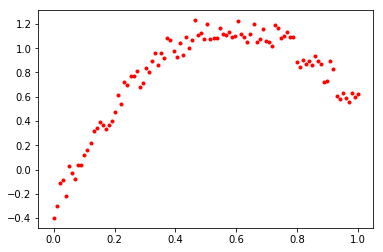

In [3]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target
orig_X = X
plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [12]:
ein=[]
eout=[]
weights=[]
#lambdas = np.linspace(0.001,1, 1000)
#lambdas = [10,5,2,1,0.9,0.8,0.7,0.6, 0.5,0.4,0.3,0.2,.1,0.01,.001]
lambdas = np.arange(0,1,0.001)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)

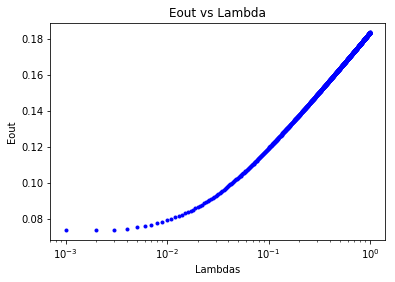

In [13]:
plt.plot(lambdas[1:],eout[1:],'b.')
plt.title('Eout vs Lambda')
plt.xlabel('Lambdas')
plt.ylabel('Eout')
plt.xscale('log')
plt.show()

#### It is evident that as lambda increases the in and out of sample errors increase. We need to find the sweet spot where as the  lambda does not result in overfitting or underfitting.

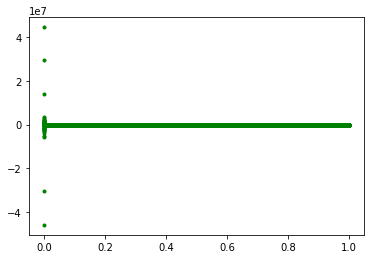

In [14]:
plt.plot(lambdas,weights,'g.')
plt.show()

#### Above plot confirms that as lambda increases the weight coefficient increases as well, In a way it shows that the regularization penalty is evident when lambda is near zero i.e. near zero does not make much difference in weight coefficient

### Find Optimal Lambda

In [15]:
min_eout_index = np.argmin(eout)
print ("Min_Eout_Index:", min_eout_index)
optimal_lambda = lambdas[min_eout_index]
print ("OPTIMAL LAMBDA:",optimal_lambda)

Min_Eout_Index: 2
OPTIMAL LAMBDA: 0.002


### Task 4.1 - Compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

In [16]:
print('Eout with optimal lambda:',  eout[min_eout_index])
print('Eout with out regularization:',  eout[0])

Eout with optimal lambda: 0.07367945668804768
Eout with out regularization: 3.6551017400426766


#### It is obvious from above eout output that with out regularization the error is very high. This proves that regularization results in better lower error on prediction.

### Task 4.2 A plot showing the estimate of Eout vs lambda on the domain [0,1]


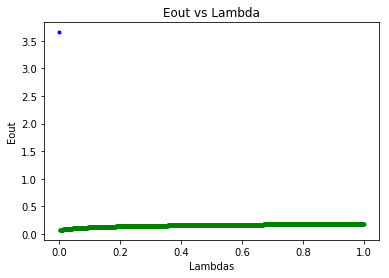

In [17]:
plt.plot(lambdas[0],eout[0],'b.')
plt.plot(lambdas[1:],eout[1:],'g.')
plt.title('Eout vs Lambda')
plt.xlabel('Lambdas')
plt.ylabel('Eout')
plt.show()

#### Above plot concludes that eout without regularization resulted in high error around 3.6 where as with the regularization it resulted in low error near zero...

### Task 4.2 A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

In [40]:
 def calc_prediction(weights, X): 
    # Used code from Michel for plotting..Credit goes to him for plotting
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

In [43]:
def demonstrate_overfitting_and_underfitting(X,y,l):
    ein=[]
    eout=[]
    pred=[]

    X_trans = transPoly(X,50)
    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
   
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    print (w)
    pred=calc_prediction(w,X)
    
    plt.plot(X, y, 'r.')
    plt.plot(X, pred , 'b-')
    plt.show()

[ 9.76511293e+00 -8.80276927e+02  1.28583030e+04 -7.48375743e+04
  1.63102949e+05  4.09911891e+05 -4.05446105e+06  1.41367674e+07
 -3.02620944e+07  4.46042044e+07 -4.59727698e+07  2.94272326e+07
 -5.72115759e+06 -5.08387095e+06  5.81427188e+05  3.52715653e+06
 -2.21144581e+06 -5.88877964e+05  1.59853332e+06  1.00158721e+05
  2.28841986e+06 -3.11060152e+06 -2.00570409e+06  7.33317537e+05
  5.66671911e+05  2.01434140e+06 -9.18905472e+05  2.53401122e+05
  8.91286862e+05 -1.62279622e+06  2.21226823e+06 -2.06355525e+06
  5.50272743e+05 -2.89005957e+06  9.66125508e+05 -5.06896529e+05
  2.84194032e+06  1.06555695e+06  3.78765341e+05 -2.08441367e+06
 -6.40162217e+05  1.20002895e+06 -2.43309697e+06  1.35324280e+06
  7.16619593e+05 -3.90273616e+05 -1.89054125e+05  1.06478317e+06
 -1.66889359e+06  1.22452669e+06 -3.88122809e+05]


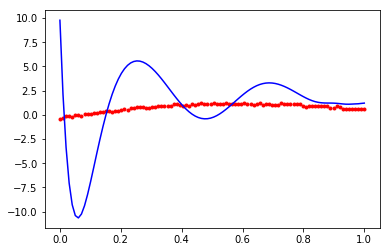

In [45]:
demonstrate_overfitting_and_underfitting(X,y,0)

[-2.95358259e-01  4.65265732e+00 -2.79743780e+00 -1.82818554e+00
 -2.69129435e-01  4.91124892e-01  6.29452315e-01  4.76388027e-01
  2.45763701e-01  3.98749842e-02 -1.06223196e-01 -1.90713188e-01
 -2.25128784e-01 -2.24217642e-01 -2.01424327e-01 -1.67311859e-01
 -1.29386841e-01 -9.25101209e-02 -5.94832966e-02 -3.16220771e-02
 -9.24170050e-03  7.96432237e-03  2.06455723e-02  2.96000607e-02
  3.56454901e-02  3.95398647e-02  4.19375967e-02  4.33701615e-02
  4.42429921e-02  4.48425040e-02  4.53488959e-02  4.58517117e-02
  4.63661559e-02  4.68488837e-02  4.72125095e-02  4.73384384e-02
  4.70878682e-02  4.63109709e-02  4.48543555e-02  4.25669719e-02
  3.93046398e-02  3.49333935e-02  2.93318256e-02  2.23926031e-02
  1.40233086e-02  4.14674314e-03 -7.29919037e-03 -2.03619261e-02
 -3.50749101e-02 -5.14584433e-02 -6.95206360e-02]


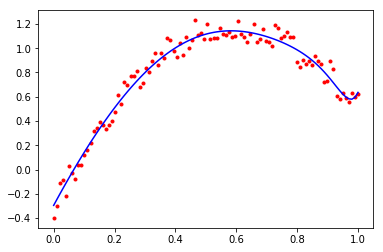

In [46]:
demonstrate_overfitting_and_underfitting(X,y,optimal_lambda)

[ 4.38128289e-01  4.79614965e-01  2.26208785e-01  8.72478740e-02
  1.51875930e-02 -2.22342148e-02 -4.13468312e-02 -5.04686449e-02
 -5.40023113e-02 -5.43691045e-02 -5.29446467e-02 -5.05307535e-02
 -4.76034944e-02 -4.44486419e-02 -4.12381417e-02 -3.80745599e-02
 -3.50175716e-02 -3.21000892e-02 -2.93382604e-02 -2.67377569e-02
 -2.42977770e-02 -2.20136125e-02 -1.98783029e-02 -1.78837014e-02
 -1.60211593e-02 -1.42819585e-02 -1.26575808e-02 -1.11398678e-02
 -9.72110917e-03 -8.39408483e-03 -7.15207668e-03 -5.98886117e-03
 -4.89869039e-03 -3.87626641e-03 -2.91671219e-03 -2.01554133e-03
 -1.16862787e-03 -3.72177181e-04  3.77301714e-04  1.08302195e-03
  1.74794280e-03  2.37479170e-03  2.96608444e-03  3.52414358e-03
  4.05111521e-03  4.54898416e-03  5.01958785e-03  5.46462878e-03
  5.88568597e-03  6.28422518e-03  6.66160832e-03]


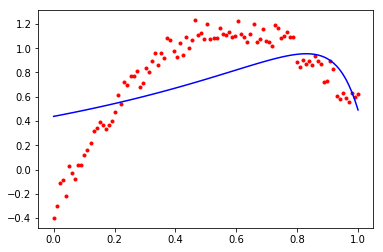

In [49]:
demonstrate_overfitting_and_underfitting(X,y,10)

### Task 5: Perform the same analysis using 10-fold cross-validation. Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. Note that the data set provided is ordered by increasing X.

In [66]:
# Cross validate on list of lambdas
def demonstrate_cross_validation(X,y,lambdas,num_folds=10):
    overall_eout=[]
    
    X_trans = transPoly(X,50)
    
    for lambd in lambdas:
        print("\nLambda: ",lambd)
        ein=[]
        eout=[]
        average_eout=[]
        
        # Split data into training and test data sets
        kf = KFold(n_splits=num_folds, shuffle=True,random_state = 5)

        # random_state fixed to get reproducible (and 'good'! :-)) results
        fold = 1
        for train_index, test_index in kf.split(X_trans):
            # Training data
            X_train_CV = X_trans[train_index]
            y_train_CV = y[train_index]
    
            # Testing data
            X_test_CV = X_trans[test_index]
            y_test_CV = y[test_index]
   
            w = weights_reg(X_train_CV,y_train_CV,lambd)
            ein.append(calc_error(w,X_train_CV,y_train_CV))
            local_eout = calc_error(w,X_test_CV,y_test_CV)
            eout.append(local_eout)
            print("K-Fold:", fold, ", Eout: ", local_eout)
            fold += 1
        
        average_eout = np.mean(eout)
        print("Average Eout: ",average_eout)
        overall_eout.append(average_eout)
    
    min_overall_eout_index = np.argmin(overall_eout)
    print ("min_overall_eout_index:", min_overall_eout_index)
    optimal_lambda_CV = lambdas[min_overall_eout_index]
    print ("\n\nOPTIMAL LAMBDA using K-Fold cross validation: {}".format(optimal_lambda_CV))

In [67]:
lambdas_cv = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
demonstrate_cross_validation(X,y,lambdas_cv)


Lambda:  1
K-Fold: 1 , Eout:  0.18355355621673222
K-Fold: 2 , Eout:  0.1599280224625318
K-Fold: 3 , Eout:  0.09791701081673398
K-Fold: 4 , Eout:  0.1957132819797012
K-Fold: 5 , Eout:  0.19255644055006574
K-Fold: 6 , Eout:  0.1164623356372406
K-Fold: 7 , Eout:  0.33183929843172233
K-Fold: 8 , Eout:  0.25926188391535554
K-Fold: 9 , Eout:  0.1515735385219184
K-Fold: 10 , Eout:  0.1516857879101191
Average Eout:  0.18404911564421206

Lambda:  0.1
K-Fold: 1 , Eout:  0.11917969412623375
K-Fold: 2 , Eout:  0.08754391676885093
K-Fold: 3 , Eout:  0.0813889599203217
K-Fold: 4 , Eout:  0.1106520441850909
K-Fold: 5 , Eout:  0.09166573379198417
K-Fold: 6 , Eout:  0.053558887086177814
K-Fold: 7 , Eout:  0.17730508247935053
K-Fold: 8 , Eout:  0.12885470972883156
K-Fold: 9 , Eout:  0.09665424558641554
K-Fold: 10 , Eout:  0.09832633089242644
Average Eout:  0.10451296045656835

Lambda:  0.01
K-Fold: 1 , Eout:  0.07912224559580043
K-Fold: 2 , Eout:  0.06986930154681223
K-Fold: 3 , Eout:  0.06154588725242

### Task 6 - Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).Observe the resulting Eout, and l compare these to previous results. What do you see? Is this what you expected? Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?